## Isolation forest Anamoly detection 

#### 1st we build the data cuase we dont have dataset

In [12]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate normal data with higher density in the middle
normal_data_center = np.random.normal(loc=0, scale=1, size=(300, 2))

# Generate normal data with lower density around the center
normal_data_outskirts = np.random.normal(loc=0, scale=3, size=(100, 2))

# Generate outliers around the normal data
outliers = np.random.normal(loc=10, scale=5, size=(50, 2))

# Combine normal data and outliers
data = np.vstack([normal_data_center, normal_data_outskirts, outliers])

# Create a DataFrame
columns = ['Feature1', 'Feature2']
df = pd.DataFrame(data, columns=columns)

# Save the dataset to a CSV file
df.to_csv('healthcare_dataset.csv', index=False)

# Display the first few rows of the dataset
print(df.head())


   Feature1  Feature2
0  0.496714 -0.138264
1  0.647689  1.523030
2 -0.234153 -0.234137
3  1.579213  0.767435
4 -0.469474  0.542560


In [13]:
df = pd.read_csv('healthcare_dataset.csv' )

In [14]:
df

,Feature1,Feature2
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560
...,...,...
445,14.102411,12.536370
446,15.333373,15.846478
447,16.910795,13.243549
448,9.164410,10.733568


In [15]:
import matplotlib.pyplot as plt

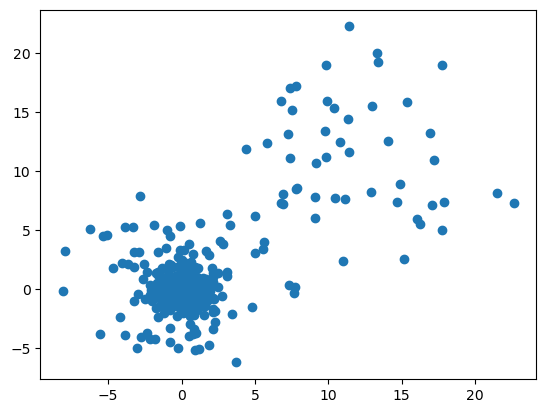

In [16]:
plt.scatter(df.iloc[:,0] , df.iloc[:,1])

In [17]:
from sklearn.ensemble import IsolationForest     

In [18]:
clf = IsolationForest(contamination=0.2)   # u can chnge the val   or we can use "auto" their 

clf.fit(df) 

prediction =clf.predict(df)

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
prediction   # you get data 1 , -1   and -1 is outlier 

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [20]:
set(prediction)  

{-1, 1}

In [21]:
index =np.where(prediction < 0)

In [23]:
index 

(array([302, 303, 304, 307, 311, 312, 315, 317, 319, 320, 321, 323, 325,
        327, 334, 335, 337, 338, 340, 342, 351, 352, 353, 354, 360, 361,
        366, 369, 370, 374, 375, 376, 377, 381, 382, 384, 387, 390, 394,
        397, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
        412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
        425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
        438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449],
       dtype=int64),)

In [24]:
x=df.values

In [25]:
x

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

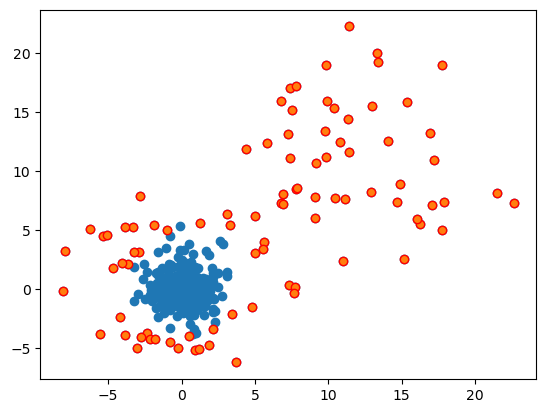

In [26]:
index =np.where(prediction < 0) 
plt.scatter(df.iloc[:,0] , df.iloc[:,1]) 
plt.scatter(x[index,0] , x[index,1]  , edgecolors="r")     # here we get outlier 